In [1]:
! chmod 600 /content/kaggle.json

! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d shantanudhakadd/bank-customer-churn-prediction

100% 262k/262k [00:00<00:00, 798kB/s]
100% 262k/262k [00:00<00:00, 797kB/s]


In [2]:
import zipfile
zip_file = zipfile.ZipFile('/content/bank-customer-churn-prediction.zip')
zip_file.extractall('/tmp/')

In [3]:
pip install skfeature-chappers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 3.8 MB/s eta 0:00:00


In [4]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.1 MB/s eta 0:00:00


In [5]:
#import all realated libraries
# import libraries for data analysis
import numpy as np
import pandas as pd
import random
import os

# import libraries for label encoder
from sklearn.preprocessing import LabelEncoder

# import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import pickle and json file for columns and model file
import pickle
import json

# import warnings for ignore the warnings
import warnings 
warnings.filterwarnings("ignore")


# library for model selection and models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# impory library for scaling purpose
from sklearn.preprocessing import StandardScaler

# evaluation metrics for classification model
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, f1_score

# import libraries for feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif, VarianceThreshold


# import libraries for balancing the data
from imblearn.over_sampling import SMOTE


import xgboost as xgb
import lightgbm as lgbm
import catboost as cb

# full display
pd.set_option("display.max_columns",None)

In [6]:
df = pd.read_csv("/tmp/Churn_Modelling.csv")

In [7]:
# make backup of data
df1 = df.copy()

In [8]:
def set_seed(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    os.environ["PYTHONHASHSEED"] = str(seed_value)
    

SEED = 42
set_seed(SEED)

In [9]:
df1.info() # we take thge information about data typoe of features and null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df_stat = df1.select_dtypes(exclude = "object")  # here we remove the object data type column and store into new data frame

In [11]:
# we check here the uniques count of every column 
for col in df1.columns:
    c = df1[col].nunique()
    print(f"Unique count of {col} is {c}")

Unique count of RowNumber is 10000
Unique count of CustomerId is 10000
Unique count of Surname is 2932
Unique count of CreditScore is 460
Unique count of Geography is 3
Unique count of Gender is 2
Unique count of Age is 70
Unique count of Tenure is 11
Unique count of Balance is 6382
Unique count of NumOfProducts is 4
Unique count of HasCrCard is 2
Unique count of IsActiveMember is 2
Unique count of EstimatedSalary is 9999
Unique count of Exited is 2


In [12]:
# we checlk here the null count of every column
df1.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df1.duplicated().sum() # check the duplicated rows

0

In [14]:
del df1["CustomerId"]
del df1["RowNumber"]

In [15]:
le=LabelEncoder()
df1["Surname"]=le.fit_transform(df1["Surname"])
df1["Geography"]=le.fit_transform(df1["Geography"])
df1["Gender"]=le.fit_transform(df1["Gender"])

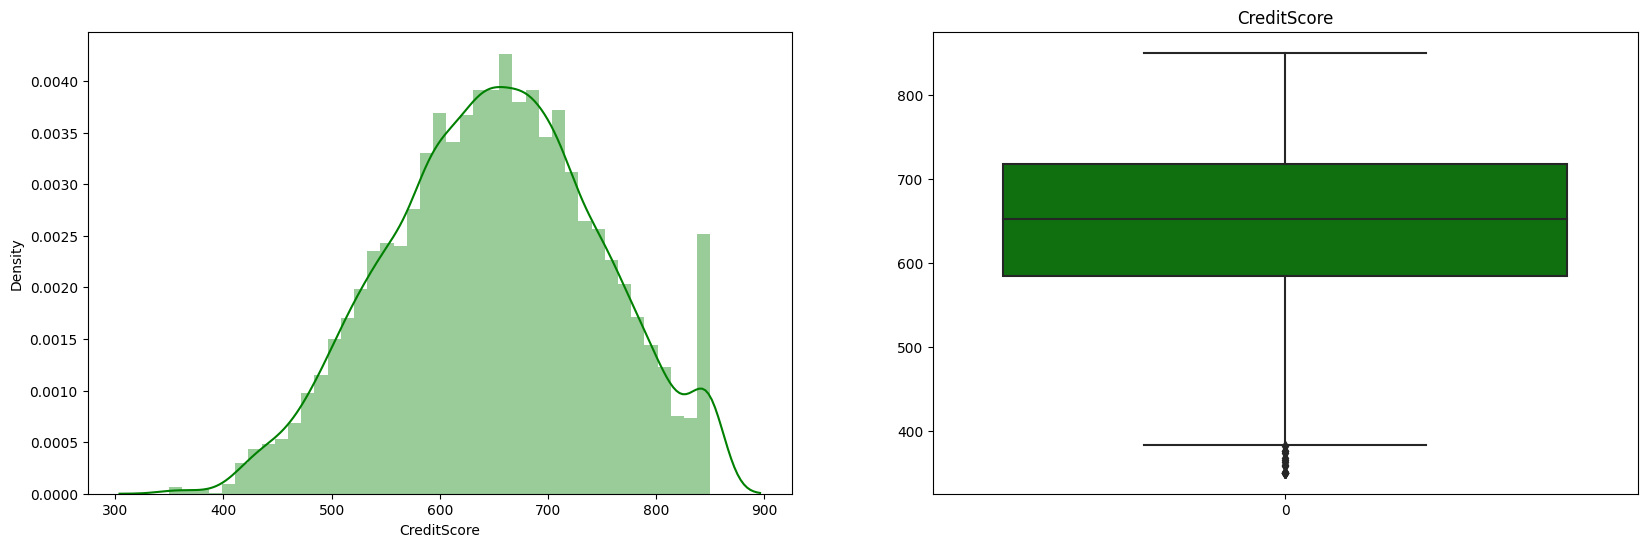

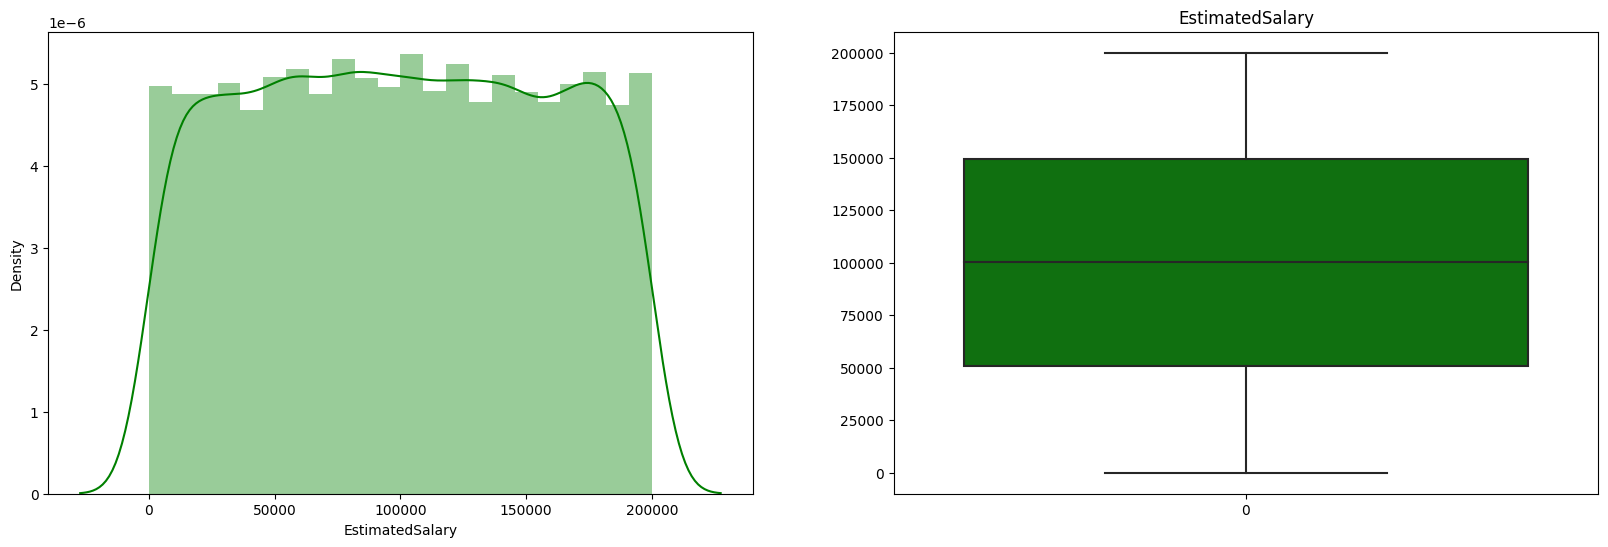

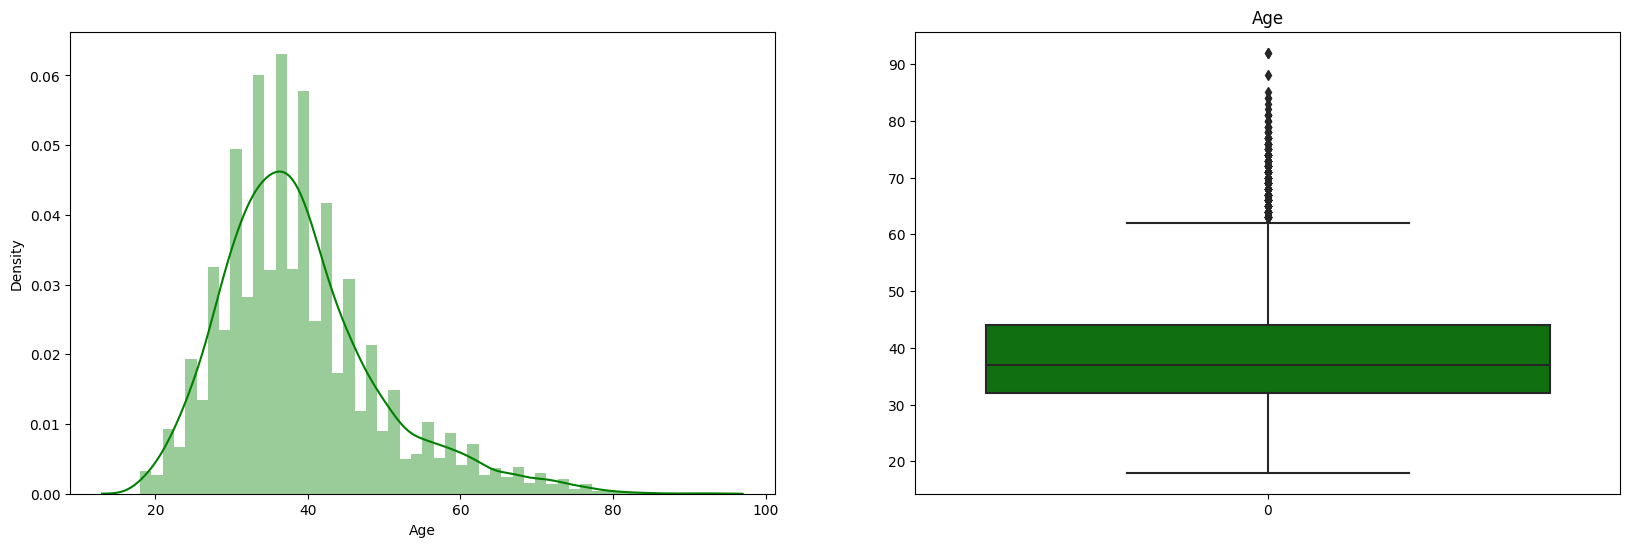

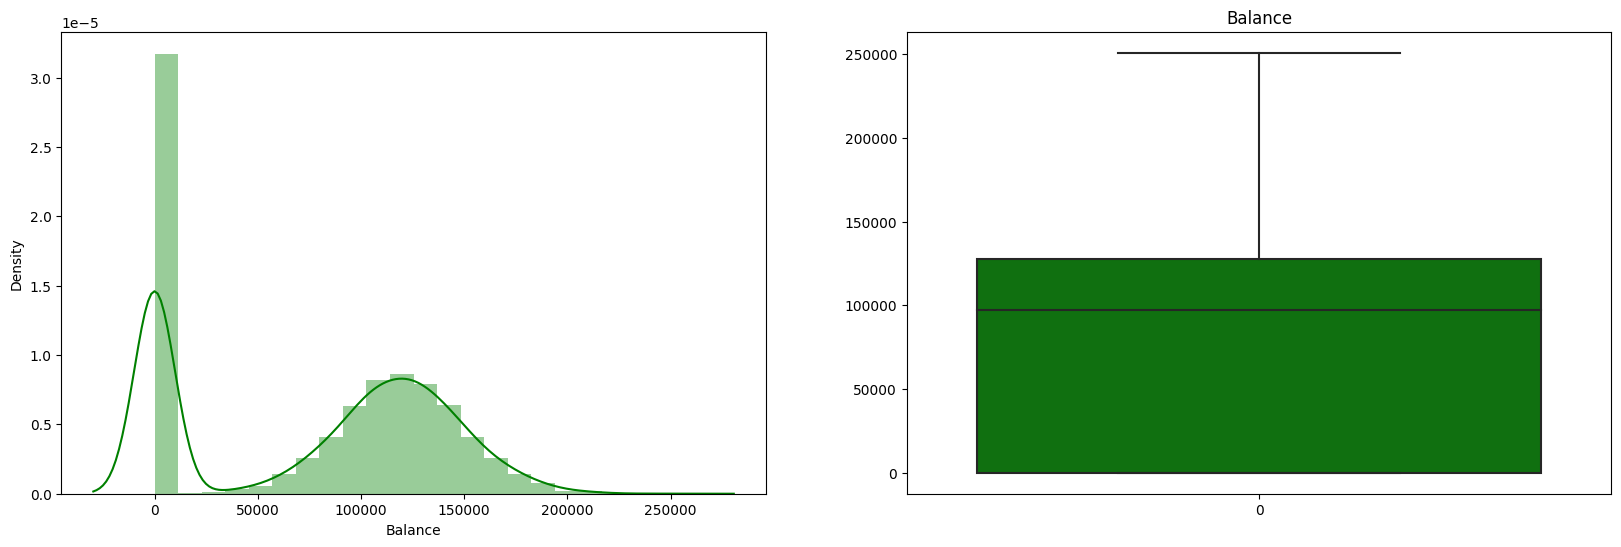

In [16]:
# here we check the distribution and outliers of continous columns.
for col in ["CreditScore","EstimatedSalary","Age","Balance"]:
    fig,ax=plt.subplots(1,2,figsize=(20,6))
    sns.distplot(df1[col],ax=ax[0],color = "g")
    sns.boxplot(df1[col],ax=ax[1],color = "g")
    plt.title(col)
    

In [17]:
for col in ["Geography","Gender","Tenure","NumOfProducts","NumOfProducts","HasCrCard","IsActiveMember"]:
    print(col)
    print(f"The value count of {col} is \n{df1[col].value_counts()}")
    print("*"*100)

Geography
The value count of Geography is 
0    5014
1    2509
2    2477
Name: Geography, dtype: int64
****************************************************************************************************
Gender
The value count of Gender is 
1    5457
0    4543
Name: Gender, dtype: int64
****************************************************************************************************
Tenure
The value count of Tenure is 
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
****************************************************************************************************
NumOfProducts
The value count of NumOfProducts is 
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
****************************************************************************************************
NumOfProducts
The value count of NumOfProducts is 
1    5084
2    4590
3     266
4      60
Name: Nu

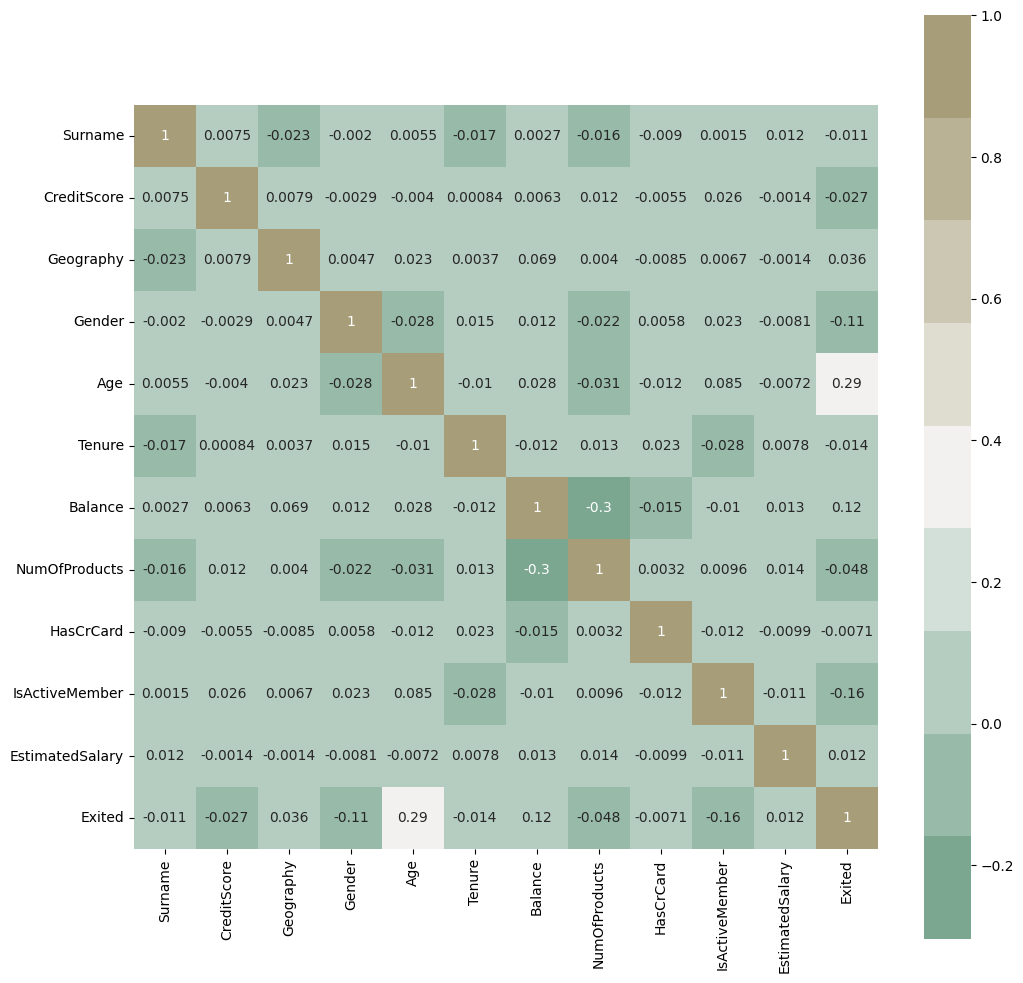

In [18]:
cmap=sns.diverging_palette(150,75,  s=40, l=65, n=9)
corrmat = df1.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, square=True);

In [19]:
Q1=df1.quantile(0.25)
Q3=df1.quantile(0.75)
IQR=Q3-Q1
IQR
print("outlier Counter of the all features")
((df1 < (Q1 - 1.5 * IQR)) | (df1> (Q3 + 1.5 * IQR))).sum()

outlier Counter of the all features


Surname               0
CreditScore          15
Geography             0
Gender                0
Age                 359
Tenure                0
Balance               0
NumOfProducts        60
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited             2037
dtype: int64

In [20]:
for col in df1.columns:
    if df1[col].dtypes != 'object':
        q1 , q3 =df1[col].quantile(0.25),df1[col].quantile(0.75)
        iqr = q3 - q1
        ll = q1-1.5*iqr
        ul = q3 + 1.5*iqr
        # df1["CreditScore"] = np.where(df1["CreditScore"]>ul,df1["CreditScore"].mean(),np.where(df1["CreditScore"]<ll,df1["CreditScore"].mean(),df1["CreditScore"]))  
        df1["Age"] = np.where(df1["Age"]>ul,df1["Age"].mean(),np.where(df1["Age"]<ll,df1["Age"].mean(),df1["Age"]))  
        df1["NumOfProducts"] = np.where(df1["NumOfProducts"]>ul,df1["NumOfProducts"].mean(),np.where(df1["NumOfProducts"]<ll,df1["NumOfProducts"].mean(),df1["NumOfProducts"]))

In [21]:
print("outlier Counter of the all features")
((df1 < (Q1 - 1.5 * IQR)) | (df1> (Q3 + 1.5 * IQR))).sum()

outlier Counter of the all features


Surname               0
CreditScore          15
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited             2037
dtype: int64

In [22]:
df1['Age'].unique()

array([38.9218])

In [23]:
df1.columns


Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [24]:
## Data Imbalancing
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
# import libraries for balancing the data
from imblearn.over_sampling import SMOTE

x=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values
# S=RandomOverSampler()
sm = SMOTE(sampling_strategy=0.75)
x_data,y_data=sm.fit_resample(x,y)
print(Counter(y_data))

Counter({0: 7963, 1: 5972})


In [25]:
## Data Normalization
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
d=mms.fit_transform(x_data)
d

array([[0.38041624, 0.538     , 0.        , ..., 1.        , 1.        ,
        0.50673489],
       [0.40156943, 0.516     , 1.        , ..., 0.        , 1.        ,
        0.56270874],
       [0.69600819, 0.304     , 0.        , ..., 1.        , 0.        ,
        0.56965435],
       ...,
       [0.10865828, 0.65906325, 0.5       , ..., 1.        , 0.58408635,
        0.04074057],
       [0.6343605 , 0.63393465, 0.5       , ..., 0.72033337, 0.        ,
        0.7776016 ],
       [0.79719827, 0.78328473, 0.        , ..., 0.08171496, 0.        ,
        0.01914356]])

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(d,y_data,random_state=45,test_size=0.20, stratify = y_data)

In [27]:
x_train

array([[0.49812351, 0.53      , 0.        , ..., 1.        , 0.        ,
        0.98241687],
       [0.09416581, 0.612     , 0.5       , ..., 0.        , 1.        ,
        0.10537776],
       [0.19303553, 0.2316453 , 0.        , ..., 0.        , 0.        ,
        0.90647983],
       ...,
       [0.35516888, 0.37      , 0.5       , ..., 1.        , 1.        ,
        0.59412664],
       [0.18594336, 0.71      , 0.5       , ..., 0.        , 1.        ,
        0.05030965],
       [0.98839986, 0.202     , 0.        , ..., 1.        , 1.        ,
        0.90074022]])

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

pipeline_logistic=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LogisticRegression())])

pipeline_decision_t=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeClassifier())])


pipeline_random_f=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestClassifier())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("kn_classifier",KNeighborsClassifier())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("xg_classifier",XGBClassifier())])


pipeline_svm=Pipeline([("scalar5",StandardScaler()),
                     ("svm_classifier",SVC())])
pipelines = [pipeline_logistic, pipeline_decision_t, pipeline_random_f, pipeline_kn, pipeline_xgb,pipeline_svm]
pipe_dict = {0: "LogisticRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGB",5 : "SCV"}
for pipe in pipelines:
    pipe.fit(x_train, y_train)
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_train,y_train,scoring="f1", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LogisticRegression: 0.517182 
DecisionTree: 0.734060 
RandomForest: 0.795503 
KNeighbors: 0.684986 
XGB: 0.794184 
SCV: 0.698460 


In [29]:
data = {'Model': [], 'F1 Score (mean)': [], 'F1 Score (std)': []}
for i, model in enumerate(pipelines):
    data['Model'].append(pipe_dict[i])
    data['F1 Score (mean)'].append(cv_results_rms[i].mean())
    data['F1 Score (std)'].append(cv_results_rms[i].std())

# Membuat dataframe dari data
df = pd.DataFrame(data)
print(df)

                Model  F1 Score (mean)  F1 Score (std)
0  LogisticRegression         0.517182        0.019444
1        DecisionTree         0.734060        0.013657
2        RandomForest         0.795503        0.011238
3          KNeighbors         0.684986        0.011311
4                 XGB         0.794184        0.009113
5                 SCV         0.698460        0.013604


In [30]:
 # as we seen that support vector machine gives best accuracy no underfittion and overfitting problem occur
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.8371008252601363

In [32]:
model.score(x_train,y_train)

1.0

In [33]:
# for finding the accruracy of training 
y_pred_train  = model.predict(x_train)
ac_score_tr   = accuracy_score(y_train,y_pred_train)
print("ac_score_tr",ac_score_tr)
conf_mT_tr    = confusion_matrix(y_train,y_pred_train)
print("conf_mT_tr\n",conf_mT_tr)
cls_report_tr = classification_report(y_train,y_pred_train)
print("cls_report_tr\n",cls_report_tr)

ac_score_tr 1.0
conf_mT_tr
 [[6370    0]
 [   0 4778]]
cls_report_tr
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      4778

    accuracy                           1.00     11148
   macro avg       1.00      1.00      1.00     11148
weighted avg       1.00      1.00      1.00     11148



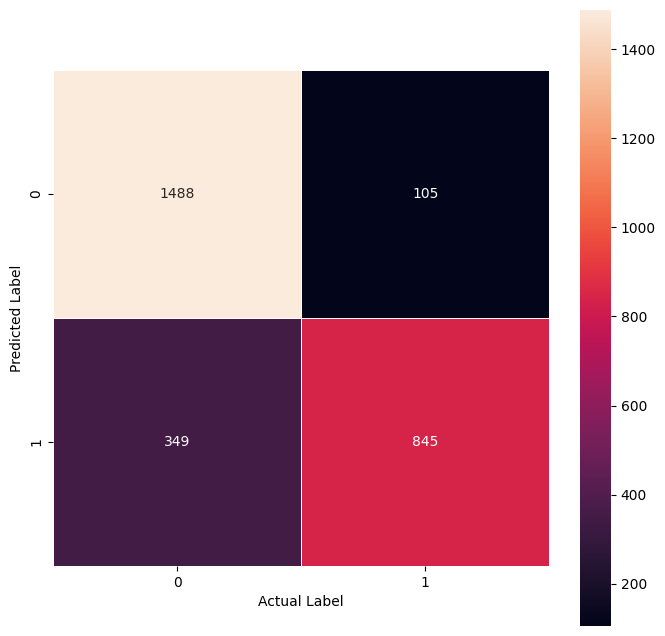

In [34]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".0f",linewidth=.5, square=True);
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');

In [35]:
score = metrics.accuracy_score(y_test,y_pred)
print("Accuracy:", score)

Accuracy: 0.8371008252601363


In [36]:
print("Report:",metrics.classification_report(y_test,y_pred))

Report:               precision    recall  f1-score   support

           0       0.81      0.93      0.87      1593
           1       0.89      0.71      0.79      1194

    accuracy                           0.84      2787
   macro avg       0.85      0.82      0.83      2787
weighted avg       0.84      0.84      0.83      2787



In [37]:
MSE = mse(y_test, y_pred)
MAE = mae(y_test, y_pred)
print("MSE:",MSE)
print("RMSE:",np.sqrt(MSE))
print("MAE:",MAE)

MSE: 0.16289917473986365
RMSE: 0.40360769905920235
MAE: 0.16289917473986365


In [38]:
x_train = pd.DataFrame(data=x_train, columns=['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary'])
x_test = pd.DataFrame(data=x_test, columns=['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary'])

In [39]:

from xgboost import XGBClassifier

x_train["AV_label"] = 0
x_test["AV_label"]  = 1

# make one big dataset
all_data = pd.concat([x_train, x_test], axis=0, ignore_index=True)

# shuffle
all_data_shuffled = all_data.sample(frac=1)

# create our DMatrix (the XGBoost data structure)
X = all_data_shuffled.drop(['AV_label'], axis=1)
y = all_data_shuffled['AV_label']
XGBdata = xgb.DMatrix(data=X,label=y)

# our XGBoost parameters
params = {"objective":"binary:logistic",
          "eval_metric":"logloss",
          'learning_rate': 0.05,
          'max_depth': 5, }

# perform cross validation with XGBoost
cross_val_results = xgb.cv(dtrain=XGBdata, params=params, 
                       nfold=5, metrics="auc", 
                       num_boost_round=200,early_stopping_rounds=20,
                       as_pandas=True)

# print out the final result
print((cross_val_results["test-auc-mean"]).tail(1))

4    0.510015
Name: test-auc-mean, dtype: float64


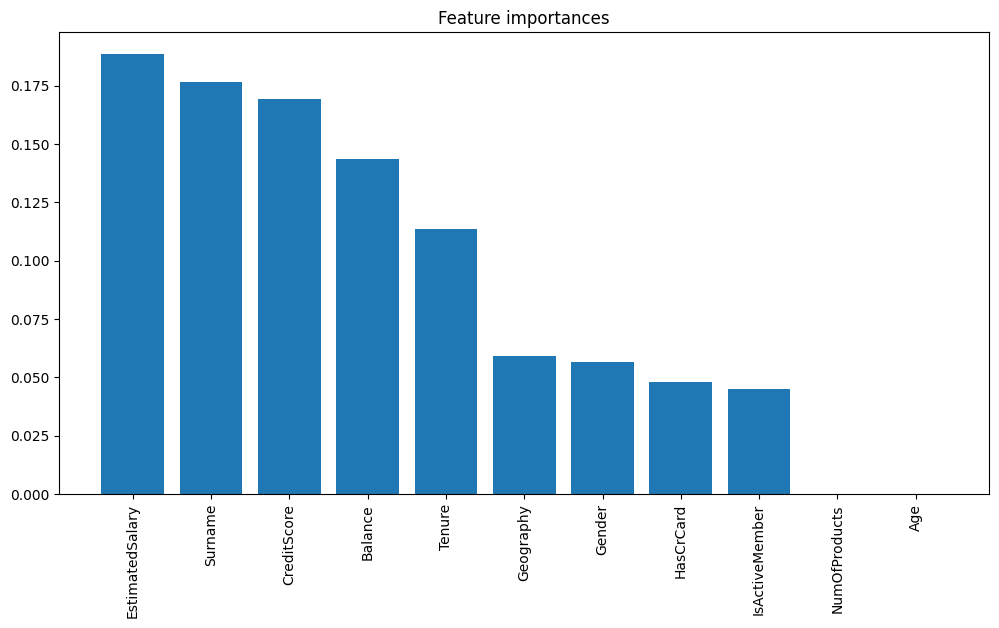

In [43]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Instantiate a random forest classifier object
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2)

# Fit the classifier to the data
rfc.fit(X, y)

# Get the feature importances
importances = rfc.feature_importances_

# Sort the features by importance in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()